<a href="https://colab.research.google.com/github/diamondmangrum/UQ-Bio2022/blob/main/HACKATHON%20FOR%20Module1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[link text](https://)figshare.com/browse

In [ ]:
# Loading libraries
import random
import matplotlib.pyplot as plt             # Library used for plotting
from matplotlib.patches import Rectangle    # Module to plot a rectangle in the image
import urllib.request                       # Library to download data
import numpy as np                          # Library for array manipulation
import seaborn as sn                        # Library for advanced plotting
import pandas as pd                         # Library to manipulate data frames
import tifffile                             # Library to store numpy arrays as TIFF
import pathlib                              # Library to work with file paths
from pathlib import Path                    # Library to work with file paths
import skimage                              # Library for image manipulation. scikit-image
from skimage.io import imread               # Module from skimage
from matplotlib import animation            # Module to plot animations
import ipywidgets as widgets                # Library to create widgets 
from ipywidgets import interact, interactive, HBox, Layout, VBox # Importing modules and functions

In [ ]:
urllib.request.urlretrieve("https://cildata.crbs.ucsd.edu/media/images/40653/40653.tif", './image_cell.tif')  
# Importing the image as variable img_test
figName = './image_cell.tif'
img_test = imread(str(figName)) 


In [ ]:
print(img_test.shape)

(615, 670, 3)


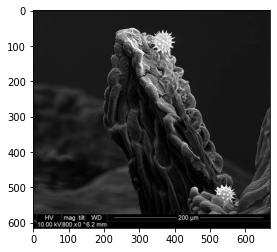

In [ ]:
img_selected = img_test[:,:,0]
plt.figure()
plt.imshow(img_selected,cmap='gray') 
plt.show()


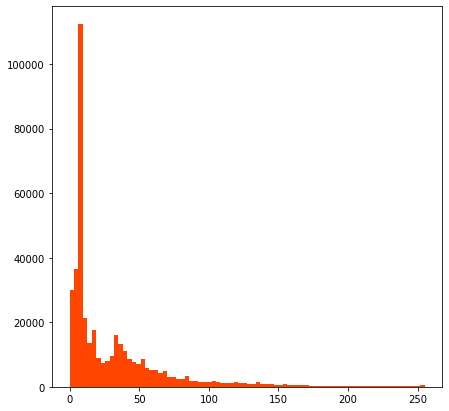

In [ ]:
plt.figure(figsize=(7,7))

plt.hist(img_test[:,:,1].flatten(), bins=80,color='orangered')
plt.show()

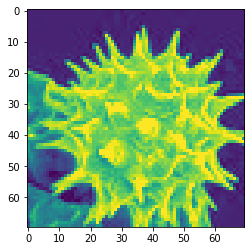

In [ ]:
plt.figure()
plt.imshow(img_test[50:120,330:400,0])
plt.show()

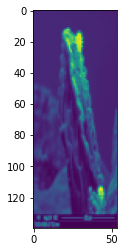

In [ ]:

from skimage.transform import resize
img_resized = resize(img_test, (200, 50))

plt.figure()
plt.imshow(img_resized[:,:,0])
plt.show()

In [ ]:
#help(resize)

Help on function resize in module skimage.transform._warps:

resize(image, output_shape, order=None, mode='reflect', cval=0, clip=True, preserve_range=False, anti_aliasing=None, anti_aliasing_sigma=None)
    Resize image to match a certain size.
    
    Performs interpolation to up-size or down-size N-dimensional images. Note
    that anti-aliasing should be enabled when down-sizing images to avoid
    aliasing artifacts. For down-sampling with an integer factor also see
    `skimage.transform.downscale_local_mean`.
    
    Parameters
    ----------
    image : ndarray
        Input image.
    output_shape : tuple or ndarray
        Size of the generated output image `(rows, cols[, ...][, dim])`. If
        `dim` is not provided, the number of channels is preserved. In case the
        number of input channels does not equal the number of output channels a
        n-dimensional interpolation is applied.
    
    Returns
    -------
    resized : ndarray
        Resized version of the

Transformation matrix : 
 [[  0.88388348  -0.88388348 100.        ]
 [  0.88388348   0.88388348   1.        ]
 [  0.           0.           1.        ]] 



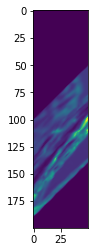

In [ ]:

tform = transform.SimilarityTransform(
    scale = 1.25,                  # float, scaling value
    rotation = np.pi/4,           # Rotation angle in counter-clockwise direction as radians. pi/180 rad = 1 degrees
    translation=(100, 1))          # (x, y) values for translation
print('Transformation matrix : \n', tform.params , '\n')

# Applying the transformation
img_crazy = transform.warp(img_resized, tform.inverse)
plt.figure()
plt.imshow(img_crazy[:,:,0])
plt.show()

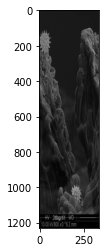

In [ ]:
# another soln to resizing using the PIL library
from PIL import Image

image_copy = img_test.copy()
h, w, c = image_copy.shape
h = h * 2
w = w/2
#important to turn the float points into integers apparently
h = int(h)
w = int(w)

image_copy.resize((h,w,c))
plt.figure()
plt.imshow(image_copy[:,:,0],cmap='gray')
plt.show()

In [ ]:
#Getting the PCA in our image
from sklearn.decomposition import PCA
pca = PCA().fit(training_df)

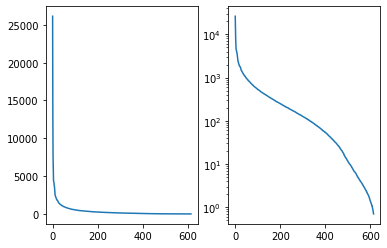

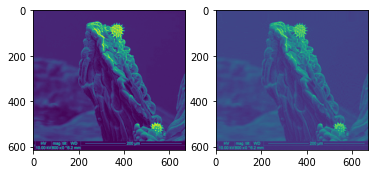

In [ ]:
# Image compression using SVD
[U,S,W] = np.linalg.svd(img_test[:,:,0])

y = S
x = range(len(y))

fig, axs = plt.subplots(1, 2)
axs[0].plot(y)
axs[1].plot(y)
axs[1].set_yscale('log')
Nmodes = 100
new_img = U[:,:Nmodes]@np.diag(S[:Nmodes])@W[:Nmodes,:]
fig, axs = plt.subplots(1,2)
axs[0].imshow(img_test[:,:,0])
axs[1].imshow(new_img)
plt.show()